In [1]:
# Import packages
import os

import matplotlib.pyplot as plt
import pandas as pd
import earthpy as et


In [2]:
# URL for .csv with avg monthly precip data
avg_monthly_precip_url = "https://ndownloader.figshare.com/files/12710618"

# Download file
et.data.get_data(url=avg_monthly_precip_url)


'/Users/Jroldan001/earth-analytics/data/earthpy-downloads/avg-precip-months-seasons.csv'

In [3]:
# Set working directory to earth-analytics
os.chdir(os.path.join(et.io.HOME,
                      "earth-analytics",
                      "data"))


In [4]:
# Import data from .csv file
fname = os.path.join("earthpy-downloads",
                     "avg-precip-months-seasons.csv")

avg_monthly_precip = pd.read_csv(fname)

avg_monthly_precip


,months,precip,seasons
0,Jan,0.70,Winter
1,Feb,0.75,Winter
2,Mar,1.85,Spring
3,Apr,2.93,Spring
4,May,3.05,Spring
5,June,2.02,Summer
6,July,1.93,Summer
7,Aug,1.62,Summer
8,Sept,1.84,Fall
9,Oct,1.31,Fall


In [5]:
# See first 5 rows
avg_monthly_precip.head()


,months,precip,seasons
0,Jan,0.70,Winter
1,Feb,0.75,Winter
2,Mar,1.85,Spring
3,Apr,2.93,Spring
4,May,3.05,Spring


In [6]:
# See last 5 rows
avg_monthly_precip.tail()


,months,precip,seasons
7,Aug,1.62,Summer
8,Sept,1.84,Fall
9,Oct,1.31,Fall
10,Nov,1.39,Fall
11,Dec,0.84,Winter


In [7]:
# Information about the dataframe
avg_monthly_precip.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   months   12 non-null     object 
 1   precip   12 non-null     float64
 2   seasons  12 non-null     object 
dtypes: float64(1), object(2)
memory usage: 416.0+ bytes


In [8]:
# Get column names
avg_monthly_precip.columns


Index(['months', 'precip', 'seasons'], dtype='object')

In [9]:
# Number of rows and columns
avg_monthly_precip.shape


(12, 3)

In [10]:
# Summary stats of all numeric columns
avg_monthly_precip.describe()


,precip
count,12.000000
mean,1.685833
std,0.764383
min,0.700000
25%,1.192500
50%,1.730000
75%,1.952500
max,3.050000


In [11]:
# Median of all numeric columns
avg_monthly_precip.median()


precip    1.73
dtype: float64

In [12]:
# Summary stats on precip column as dataframe
avg_monthly_precip[["precip"]].describe()


,precip
count,12.000000
mean,1.685833
std,0.764383
min,0.700000
25%,1.192500
50%,1.730000
75%,1.952500
max,3.050000


In [13]:
# Summary stats on precip column as series
avg_monthly_precip["precip"].describe()


count    12.000000
mean      1.685833
std       0.764383
min       0.700000
25%       1.192500
50%       1.730000
75%       1.952500
max       3.050000
Name: precip, dtype: float64

In [14]:
# Sort in descending order for precip
avg_monthly_precip.sort_values(by="precip",
                               ascending=False)


,months,precip,seasons
4,May,3.05,Spring
3,Apr,2.93,Spring
5,June,2.02,Summer
6,July,1.93,Summer
2,Mar,1.85,Spring
8,Sept,1.84,Fall
7,Aug,1.62,Summer
10,Nov,1.39,Fall
9,Oct,1.31,Fall
11,Dec,0.84,Winter


In [15]:
# Sort in descending order for precip
avg_monthly_precip.sort_values(by="precip",
                               ascending=True)


,months,precip,seasons
0,Jan,0.70,Winter
1,Feb,0.75,Winter
11,Dec,0.84,Winter
9,Oct,1.31,Fall
10,Nov,1.39,Fall
7,Aug,1.62,Summer
8,Sept,1.84,Fall
2,Mar,1.85,Spring
6,July,1.93,Summer
5,June,2.02,Summer


In [16]:
# Convert values from inches to millimeters
avg_monthly_precip["precip"] *= 25.4

avg_monthly_precip


,months,precip,seasons
0,Jan,17.780,Winter
1,Feb,19.050,Winter
2,Mar,46.990,Spring
3,Apr,74.422,Spring
4,May,77.470,Spring
5,June,51.308,Summer
6,July,49.022,Summer
7,Aug,41.148,Summer
8,Sept,46.736,Fall
9,Oct,33.274,Fall


In [17]:
# Create new column with precip in the original units (inches)
avg_monthly_precip["precip_in"] = avg_monthly_precip["precip"] / 25.4

avg_monthly_precip


,months,precip,seasons,precip_in
0,Jan,17.780,Winter,0.70
1,Feb,19.050,Winter,0.75
2,Mar,46.990,Spring,1.85
3,Apr,74.422,Spring,2.93
4,May,77.470,Spring,3.05
5,June,51.308,Summer,2.02
6,July,49.022,Summer,1.93
7,Aug,41.148,Summer,1.62
8,Sept,46.736,Fall,1.84
9,Oct,33.274,Fall,1.31


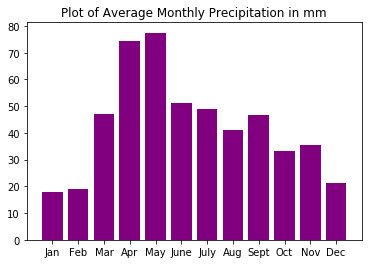

In [18]:
# Plot the data
f, ax = plt.subplots()

ax.bar(x=avg_monthly_precip.months,
       height=avg_monthly_precip.precip,
       color="purple")

ax.set(title="Plot of Average Monthly Precipitation in mm")
plt.show()


In [19]:
# Group data by seasons and summarize precip
precip_by_season=avg_monthly_precip.groupby(["seasons"])[["precip"]].describe()
precip_by_season


precip                                                              
         count       mean        std     min     25%     50%     75%     max
seasons                                                                     
Fall       3.0  38.438667   7.257173  33.274  34.290  35.306  41.021  46.736
Spring     3.0  66.294000  16.787075  46.990  60.706  74.422  75.946  77.470
Summer     3.0  47.159333   5.329967  41.148  45.085  49.022  50.165  51.308
Winter     3.0  19.388667   1.802028  17.780  18.415  19.050  20.193  21.336

In [20]:
precip_by_season.columns


MultiIndex([('precip', 'count'),
            ('precip',  'mean'),
            ('precip',   'std'),
            ('precip',   'min'),
            ('precip',   '25%'),
            ('precip',   '50%'),
            ('precip',   '75%'),
            ('precip',   'max')],
           )

In [21]:
# Drop a level so there is only one index
precip_by_season.columns = precip_by_season.columns.droplevel(0)
precip_by_season


,count,mean,std,min,25%,50%,75%,max
seasons,,,,,,,,
Fall,3.0,38.438667,7.257173,33.274,34.290,35.306,41.021,46.736
Spring,3.0,66.294000,16.787075,46.990,60.706,74.422,75.946,77.470
Summer,3.0,47.159333,5.329967,41.148,45.085,49.022,50.165,51.308
Winter,3.0,19.388667,1.802028,17.780,18.415,19.050,20.193,21.336


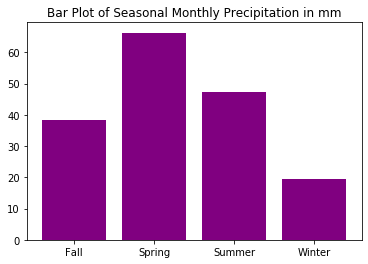

In [22]:
# Plot the data
f, ax = plt.subplots()

ax.bar(precip_by_season.index,
        precip_by_season["mean"],
        color="purple")

ax.set(title="Bar Plot of Seasonal Monthly Precipitation in mm")
plt.show()


In [23]:
# Save median of precip for each season to dataframe
avg_monthly_precip_median = avg_monthly_precip.groupby(
    ["seasons"])[["precip"]].median()

avg_monthly_precip_median


,precip
seasons,
Fall,35.306
Spring,74.422
Summer,49.022
Winter,19.050


In [24]:
# Save median of precip for each season to dataframe
avg_monthly_precip_median = avg_monthly_precip.groupby(
    ["seasons"])[["precip"]].median()

avg_monthly_precip_median


,precip
seasons,
Fall,35.306
Spring,74.422
Summer,49.022
Winter,19.050


In [25]:
avg_monthly_precip_median.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Fall to Winter
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   precip  4 non-null      float64
dtypes: float64(1)
memory usage: 64.0+ bytes


In [26]:
# Save to new dataframe with original index
avg_monthly_precip_median = avg_monthly_precip.groupby(
    ["seasons"], as_index=False)[["precip"]].median()

avg_monthly_precip_median


,seasons,precip
0,Fall,35.306
1,Spring,74.422
2,Summer,49.022
3,Winter,19.050


In [27]:
# Save summary stats of precip for each season to dataframe
avg_monthly_precip_stats = avg_monthly_precip.groupby(
    ["seasons"])[["precip"]].describe()

avg_monthly_precip_stats


precip                                                              
         count       mean        std     min     25%     50%     75%     max
seasons                                                                     
Fall       3.0  38.438667   7.257173  33.274  34.290  35.306  41.021  46.736
Spring     3.0  66.294000  16.787075  46.990  60.706  74.422  75.946  77.470
Summer     3.0  47.159333   5.329967  41.148  45.085  49.022  50.165  51.308
Winter     3.0  19.388667   1.802028  17.780  18.415  19.050  20.193  21.336

In [28]:
# Reset index
avg_monthly_precip_stats.reset_index(inplace=True)

avg_monthly_precip_stats


seasons precip                                                              
           count       mean        std     min     25%     50%     75%     max
0    Fall    3.0  38.438667   7.257173  33.274  34.290  35.306  41.021  46.736
1  Spring    3.0  66.294000  16.787075  46.990  60.706  74.422  75.946  77.470
2  Summer    3.0  47.159333   5.329967  41.148  45.085  49.022  50.165  51.308
3  Winter    3.0  19.388667   1.802028  17.780  18.415  19.050  20.193  21.336